In [5]:
import torch
# from torch.autograd import Variable
# import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# 创建假数据
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

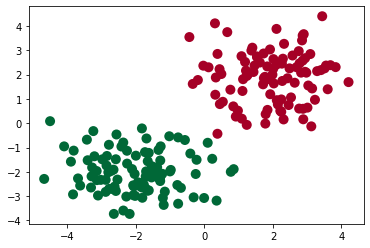

In [3]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [4]:
# Method1
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()  # madantory
        
        # 搭建图
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # 搭建前向计算过程
        x = torch.relu(self.hidden(x))  # in: n_features, out: n_hidden
        x = self.predict(x)             # in: n_hidden, out: n_output
        return x

In [6]:
# 创建实例
net1 = Net(2, 10, 2)  # n_feature: 2, n_hidden: 10, n_output: 2(2 classes)
print(net1)  # net architecture

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [7]:
# Method2
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2),
)
print(net2)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


以上两种方法构建的网络是一样的